# Milestone Project

# Data:

### Total estimated annual dollar value of utility discounts for businesses approved for ECSP benefits during the fiscal year.


Source: https://data.cityofnewyork.us/City-Government/Value-of-Energy-Cost-Savings-Program-Savings-for-B/bug8-9f3g

Updated: May 9, 2022 Accessed: Feb 24, 2023

In [1]:
import pandas as pd

data = pd.read_csv("/Users/danafelker/Downloads/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

## Initial Exploration

In [2]:
data.shape

(450, 26)

This corresponds with the number of rows and columns listed on the source website.

In [3]:
data.describe()
print(data.columns)

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')


## Data Cleaning

1. Clean column names
2. Convert string columns to numeric - not needed.
3. Extract values from strings - not needed
4. Correct Bad or Inconsistent Values - not needed
5. Deal with null values (drop or assign NaN or placeholder)
6. Remove duplicates
7. Scan for outliers - looks ok
8. Save cleaned data to csv as backup


In [4]:
#Clean column names:
def clean_col(col):
    col = col.strip() # removes white space
    col = col.replace(" ","_") #replaces spaces with underscores
    col = col.lower() #converts to lowercase
    return col

new_columns = []
for c in data.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

data.columns = new_columns
print(data.columns)

Index(['company_name', 'company_contact', 'company_email', 'company_phone',
       'address', 'city', 'state', 'postcode', 'industry', 'industry_descr',
       'company_type', 'current_fulltime', 'job_created', 'job_retain',
       'effective_date', 'total_savings',
       'savings_from_beginning_receiving_benefits', 'borough', 'latitude',
       'longitude', 'community_board', 'council_district', 'census_tract',
       'bin', 'bbl', 'nta'],
      dtype='object')


In [5]:
#Check if column types match data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   company_name                               450 non-null    object 
 1   company_contact                            450 non-null    object 
 2   company_email                              433 non-null    object 
 3   company_phone                              450 non-null    object 
 4   address                                    450 non-null    object 
 5   city                                       450 non-null    object 
 6   state                                      450 non-null    object 
 7   postcode                                   450 non-null    int64  
 8   industry                                   450 non-null    object 
 9   industry_descr                             434 non-null    object 
 10  company_type              

Potential issues:

- Dates stored as strings: not relevant for scope of this homework. No change.
- Locations (postcodes, lat/long) as floats: Also not relevant for the scope of this homework. No change.

Scan for bad/inconsistent values in numeric columns that will be most important:

- job_created = number of jobs created within the year
- total_savings = how much money the company saved for the fiscal year

Both seem reasonable in summary values

In [6]:
data.describe()

,postcode,current_fulltime,job_created,job_retain,total_savings,savings_from_beginning_receiving_benefits,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,450.000000,446.000000,11.000000,14.000000,4.500000e+02,4.500000e+02,409.000000,409.000000,409.000000,409.000000,409.000000,4.010000e+02,4.010000e+02
mean,11024.124444,124.186099,13.545455,297.500000,3.943778e+04,4.234601e+05,40.722293,-73.942376,317.982885,27.823961,2049.080685,3.295894e+06,3.163398e+09
std,405.126704,392.750810,16.409532,778.404655,1.345949e+05,1.936066e+06,0.057503,0.065553,93.925749,10.984316,7784.674799,9.897776e+05,9.483943e+08
min,10001.000000,0.000000,2.000000,4.000000,-1.099101e+05,0.000000e+00,40.555080,-74.216206,101.000000,1.000000,1.000000,1.000811e+06,1.000220e+09
25%,11101.000000,11.000000,4.000000,15.500000,1.770947e+03,1.498420e+04,40.676351,-73.984843,301.000000,26.000000,20.000000,3.009889e+06,3.006320e+09
50%,11205.000000,28.000000,10.000000,42.000000,6.101215e+03,5.431184e+04,40.721144,-73.941706,307.000000,30.000000,199.000000,3.336903e+06,3.036760e+09
75%,11232.000000,76.000000,13.500000,160.750000,2.025603e+04,2.003667e+05,40.752096,-73.909345,402.000000,36.000000,543.000000,4.005076e+06,4.003930e+09
max,11693.000000,3878.000000,60.000000,2964.000000,1.568982e+06,3.351826e+07,40.890837,-73.743730,503.000000,51.000000,94201.000000,5.168823e+06,5.070670e+09


Scan for null values in columns we'll need for analysis later on:

- jobs created
- savings

In [7]:
jobcreated_is_null = data["job_created"].isnull() #generates a boolean series
job_null = data[jobcreated_is_null] #uses the boolean to filter for rows with null values

There are null values in the jobs created column, which could artificially reduce what data is available numeric analyses. It is likely that if a program created jobs they would make sure to list it as a success metric. We will convert all null values as "0.0" to include those rows in numeric analyses.

In [8]:
#Replace null values in jobs created with 0
data.loc[data["job_created"].isnull(), "job_created"] = 0.0
data["job_created"] = data["job_created"].astype(float)
print(data["job_created"])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
445    10.0
446     0.0
447     0.0
448     0.0
449     0.0
Name: job_created, Length: 450, dtype: float64


NaN values in the jobs_created column are now zeros.

Now, let's look at savings:

In [9]:
savings_is_null = data["total_savings"].isnull() #generates a boolean series
savings_null = data[savings_is_null] #can use the boolean to filter
print(savings_null[["company_name","city","industry"]]) #then print results with specific info

Empty DataFrame
Columns: [company_name, city, industry]
Index: []


In [10]:
# No null values in savings column.
print(data["total_savings"])

#To confirm, you can see zero values represented as '0.00'

0           0.00
1      136578.20
2      302959.40
3        2159.67
4      922407.32
         ...    
445     35384.76
446      1457.26
447      8971.02
448      2484.84
449         0.00
Name: total_savings, Length: 450, dtype: float64


### Check for duplicates:

In [11]:
print(data[data.duplicated(subset=None, keep=False)] == True)

Empty DataFrame
Columns: [company_name, company_contact, company_email, company_phone, address, city, state, postcode, industry, industry_descr, company_type, current_fulltime, job_created, job_retain, effective_date, total_savings, savings_from_beginning_receiving_benefits, borough, latitude, longitude, community_board, council_district, census_tract, bin, bbl, nta]
Index: []

[0 rows x 26 columns]


Result shows empty dataframe. So, we have no duplicate rows. From manual inspection, we do not have any duplicate columns.

The data looks clean. Save as data_clean.csv for later.

In [12]:
data_cleaned = data.to_csv('data_clean.csv', index=False)

## 1. How many different companies are represented in the data set?

In [13]:
unique_companies = data["company_name"].unique()
len(unique_companies)

439

Answer: 439

This is less than the 450 rows. Are all rows filled for this column?

In [14]:
data["company_name"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 450 entries, 0 to 449
Series name: company_name
Non-Null Count  Dtype 
--------------  ----- 
450 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


Yes. So, some companies have multiple rows listed.

## 2. What is the total number of jobs created for businesses in Queens?

In [15]:
inqueens = data[data["city"] == "Queens"]
jobs_in_queens = sum(inqueens["job_created"])
print(jobs_in_queens)

90.0


## 3. How many different unique email domains names are there in the data set?

In [16]:
unique_emails = data["company_email"].unique()
len(unique_emails)

421

Some companies do not have emails listed in addition to companies having more than one project represented.

## 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

Create new object grouped by nta, with all nta groups dropped that had less than 5 entries


In [17]:
ntagrouped = data.groupby("nta").filter(lambda x: len(x) >= 5)
ntagrouped = ntagrouped.groupby("nta")

Compute summary statistics for specific columns of groups

In [18]:
totaljobs = ntagrouped["job_created"].apply(lambda x: x.sum()) #creates a pandas series of total jobs for each nta group
average_total_savings = ntagrouped["total_savings"].mean() #pandas series of average total savings values for each nta

Combine summary statistic series to make a new dataframe

In [19]:
nta_data = pd.concat([totaljobs, average_total_savings], axis='columns')
nta_data.rename(columns = {'job_created': 'total_jobs_created', 'total_savings':'ave_total_savings'}, inplace=True)

## 5. Save your result for the previous question as a CSV file.

In [20]:
save_ntadata = nta_data.to_csv('nta_data.csv', index=True)

# Matplotlib (+Seaborn)

In [21]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

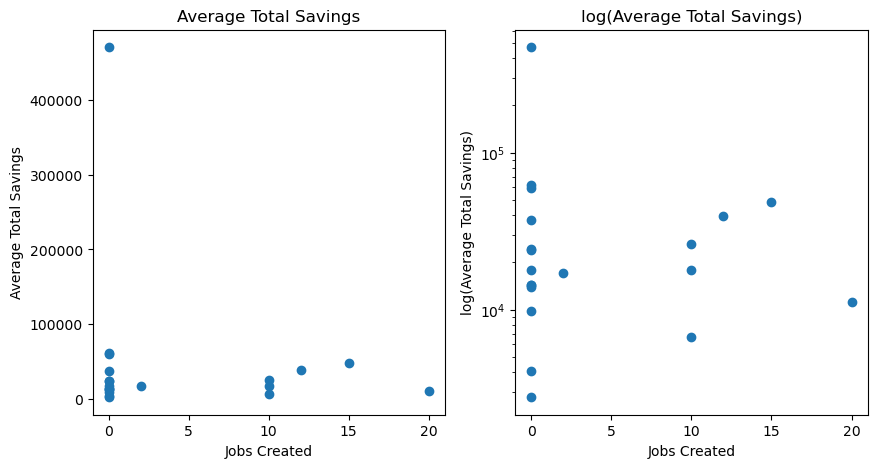

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(nta_data['total_jobs_created'], nta_data['ave_total_savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings')
plt.title('Average Total Savings')
plt.subplot(1, 2, 2)
plt.scatter(nta_data['total_jobs_created'], nta_data['ave_total_savings'])
plt.yscale("log")
plt.xlabel('Jobs Created')
plt.ylabel('log(Average Total Savings)')
plt.title('log(Average Total Savings)')

plt.show()

## 2. Create a histogram of the log of the average total savings.

First, make a dataframe column for log(average savings)

In [23]:
nta_data["log_ave_savings"] = np.log(nta_data['ave_total_savings'])

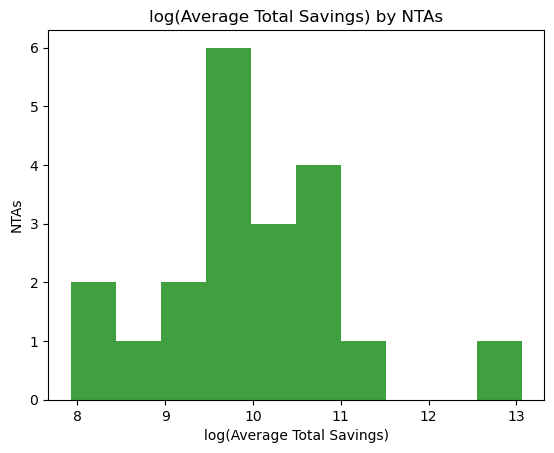

In [24]:
plt.hist(nta_data['log_ave_savings'], facecolor='g', alpha=0.75)
plt.ylabel('NTAs')
plt.xlabel('log(Average Total Savings)')
plt.title('log(Average Total Savings) by NTAs')
plt.show()

## 3. Create a line plot of the total jobs created for each month.

Remember from initial exploration that dates are in string format in our dataset. 

So, first convert dates jobs were created to datetimes.

In [25]:
data["effective_date"] = pd.to_datetime(data["effective_date"])

Create a new column for month variable

In [26]:
data["month"] = pd.DatetimeIndex(data['effective_date']).month

Group data by month and sum values across groups to give total jobs/month

In [27]:
by_month = data.groupby('month').sum()

Plot the result

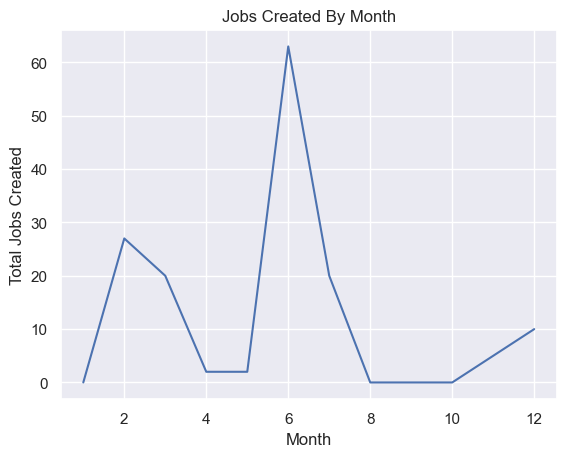

In [28]:
sns.set_theme()
by_month['job_created'].plot.line()
plt.ylabel('Total Jobs Created')
plt.xlabel('Month')
plt.title('Jobs Created By Month')
plt.show()